In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
TRAIN_DATASET_FILE = 'data/sales_train.csv.gz'

In [44]:
raw_train_dataset = pd.read_csv(TRAIN_DATASET_FILE)
print(raw_train_dataset.shape)
raw_train_dataset.tail()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [62]:
(raw_train_dataset.item_cnt_day == 0).sum()

0

In [ ]:
raw_train_dataset[]

In [45]:
oct_2014_sales_record_df = raw_train_dataset[raw_train_dataset.date_block_num == 21]
print(september_sales_record_df.shape)
oct_2015_sales_record_df = raw_train_dataset[raw_train_dataset.date_block_num == 33]
print(october_sales_record_df.shape)

(50588, 6)
(53514, 6)


In [64]:
oct_2014_tot_sales = oct_2014_sales_record_df.groupby(["shop_id", "item_id"], as_index=False)\
            .agg({"item_cnt_day": "sum"}).rename(index=str, columns={"item_cnt_day": "item_cnt_sept"})

oct_2015_tot_sales = oct_2015_sales_record_df.groupby(["shop_id", "item_id"], as_index=False)\
            .agg({"item_cnt_day": "sum"}).rename(index=str, columns={"item_cnt_day": "item_cnt_oct"})
res_df = oct_2015_tot_sales.merge(oct_2014_tot_sales, on=["shop_id", "item_id"], how="outer")
print(res_df.shape)
res_df.head()

(67744, 4)


,shop_id,item_id,item_cnt_oct,item_cnt_sept
0,2,31,1.0,NaN
1,2,486,3.0,1.0
2,2,787,1.0,NaN
3,2,794,1.0,NaN
4,2,968,1.0,NaN


In [63]:
oct_2014_tot_sales = oct_2014_sales_record_df.groupby(["shop_id", "item_id"], as_index=False)\
            .agg({"item_cnt_day": "sum"}).rename(index=str, columns={"item_cnt_day": "item_cnt_sept"})

oct_2015_tot_sales = oct_2015_sales_record_df.groupby(["shop_id", "item_id"], as_index=False)\
            .agg({"item_cnt_day": "sum"}).rename(index=str, columns={"item_cnt_day": "item_cnt_oct"})
res_df = oct_2015_tot_sales.merge(oct_2014_tot_sales, on=["shop_id", "item_id"])
print(res_df.shape)
res_df.head()

(6382, 4)


,shop_id,item_id,item_cnt_oct,item_cnt_sept
0,2,486,3.0,1.0
1,2,1075,1.0,1.0
2,2,1387,1.0,8.0
3,2,1389,1.0,11.0
4,2,1857,1.0,1.0


In [50]:
res_df["error"] = res_df["item_cnt_oct"] - res_df["item_cnt_sept"]
res_df["squard_error"] = (res_df["error"]) ** 2
print(res_df.shape)
res_df.head()

(6382, 6)


,shop_id,item_id,item_cnt_oct,item_cnt_sept,error,squard_error
0,2,486,3.0,1.0,2.0,4.0
1,2,1075,1.0,1.0,0.0,0.0
2,2,1387,1.0,8.0,-7.0,49.0
3,2,1389,1.0,11.0,-10.0,100.0
4,2,1857,1.0,1.0,0.0,0.0


#### extrem value of error

In [51]:
 res_df[(res_df["error"] < -100) | (res_df["error"] > 100)]

,shop_id,item_id,item_cnt_oct,item_cnt_sept,error,squard_error
804,12,9242,-1.0,697.0,-698.0,487204.0
813,12,11373,2253.0,68.0,2185.0,4774225.0
1057,15,20949,34.0,316.0,-282.0,79524.0
2918,28,20949,229.0,422.0,-193.0,37249.0
3612,31,20949,431.0,634.0,-203.0,41209.0
5559,55,7967,61.0,239.0,-178.0,31684.0


#### Analyse of error repartition

In [52]:
usual_error = res_df[(res_df["error"] > -100) & (res_df["error"] < 100)]
print(usual_error.shape)

(6376, 6)


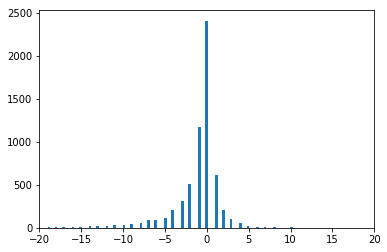

In [59]:
plt.hist(usual_error["error"], bins=500)
plt.xlim(xmin=-20, xmax=20)
plt.show()

In [54]:
sqrt(np.mean(usual_error.squard_error.values))

6.375668833465835

In [55]:
usual_error["relative_error"] = (2 * usual_error["error"]) /\
                                (usual_error["item_cnt_oct"] + usual_error["item_cnt_sept"] + 1)
print(usual_error.shape)

(6376, 7)


/Users/jacques/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


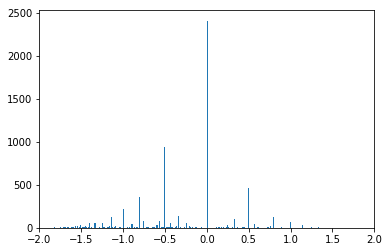

In [61]:
plt.hist(usual_error["relative_error"], bins=500)
plt.xlim(xmin=-2, xmax=2)
plt.show()

In [57]:
usual_error["squar_relative_error"] = usual_error["relative_error"] ** 2
sqrt(np.mean(usual_error.squar_relative_error.values))

/Users/jacques/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.6334707622091039